# Statistics for Project

In [1]:
# Imported packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
#'Year' was dropped from dataframe because it was redundant to date
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
data = data_orig.drop(['Year'], axis=1)

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)


data.head(5)

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


### Create new columns of means

- volatility for a stock is a numerical representation of that stock's risk; the technical term for volatility is standard deviation
- use volatility to compare to temp_anamoly

### Sample project
- https://www.datacamp.com/community/tutorials/stocks-significance-testing-p-hacking
- convert our raw closing prices into daily % returns
- use the pandas method 'pct_change()' to calculate the daily percentage change directly.

In [5]:
#create new dataset with only close cost of stocks
#stock_close = data[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]

In [3]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate return for stocks
#return = (p/p-1)-1

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

data.head()

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,CPB_Close,CPB_Volume,CORN_return,WEAT_return,CANE_return,HSY_return,SJM_return,GIS_return,PEP_return,CPB_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,32.98,"1,854,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,32.73,"1,721,200",-0.002581,-0.011576,0.021840,0.002139,-0.000259,0.005955,0.005120,-0.007580
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,31.81,"4,621,400",-0.023524,-0.021171,-0.061241,-0.001477,0.005176,0.004440,-0.007791,-0.028109
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,31.45,"4,981,500",-0.003854,-0.006903,0.000438,-0.002301,-0.003347,-0.015963,-0.012534,-0.011317
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,31.83,"1,759,800",0.020314,0.013438,0.006565,0.004449,0.006975,-0.001747,0.005200,0.012083


Text(0.5,1,'Correlation Heatmap')

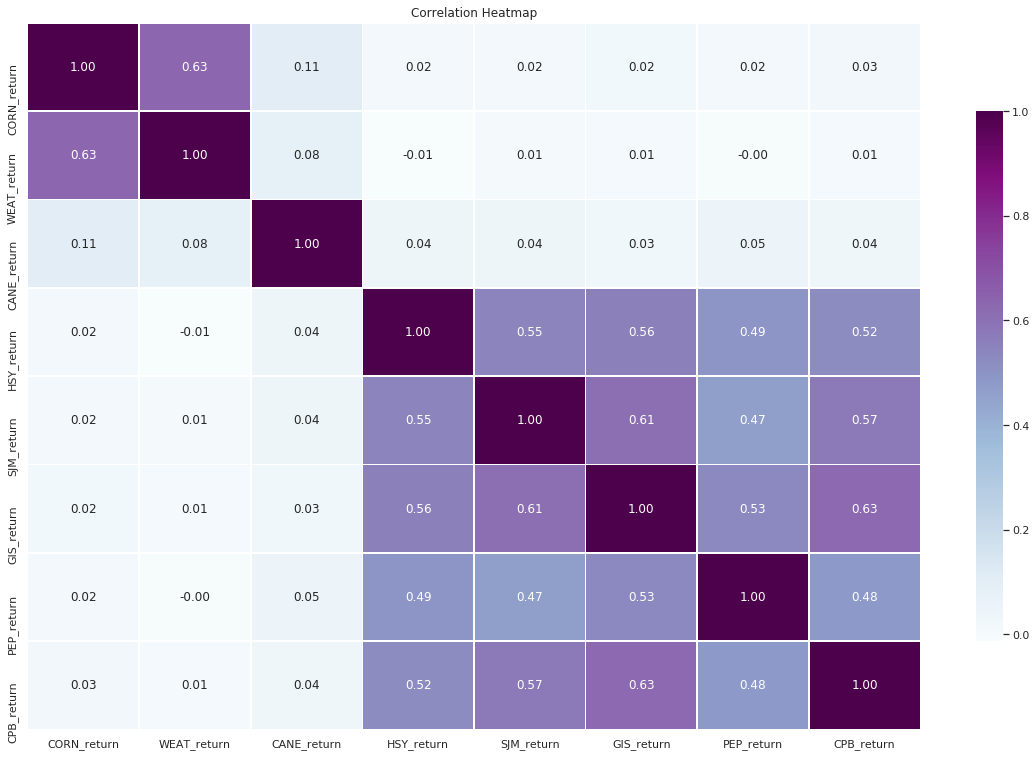

In [5]:
#looking at correlation between return values in stocks
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

stock_per_change = data[['CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

In [7]:
#cumulative daily returns
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

data.head()

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_return,CPB_return,CORN_cum_return,WEAT_cum_return,CANE_cum_return,HSY_cum_return,SJM_cum_return,GIS_cum_return,PEP_cum_return,CPB_cum_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,0.005120,-0.007580,0.997419,0.988424,1.021840,1.002139,0.999741,1.005955,1.005120,0.992420
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,-0.007791,-0.028109,0.973956,0.967498,0.959261,1.000658,1.004916,1.010422,0.997289,0.964524
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,-0.012534,-0.011317,0.970202,0.960819,0.959681,0.998355,1.001552,0.994293,0.984789,0.953608
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,0.005200,0.012083,0.989911,0.973731,0.965981,1.002797,1.008538,0.992556,0.989910,0.965130


Text(0.5,1,'Correlation Heatmap')

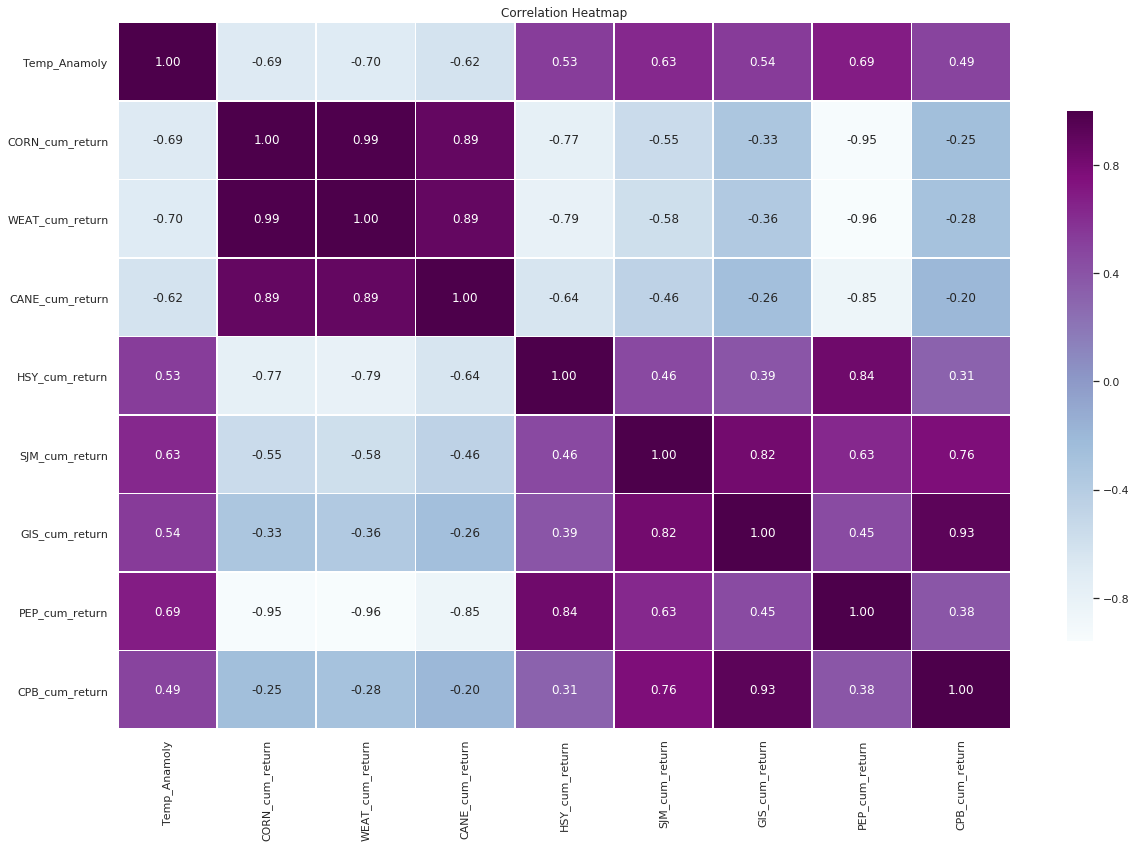

In [9]:
#Correlation with cumulative return
#big correlation with return

stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

### P Values

- https://www.statisticshowto.com/p-value/

- A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.
- P values are expressed as decimals although it may be easier to understand what they are if you convert them to a percentage. For example, a p value of 0.0254 is 2.54%. This means there is a 2.54% chance your results could be random (i.e. happened by chance). That’s pretty tiny. On the other hand, a large p-value of .9(90%) means your results have a 90% probability of being completely random and not due to anything in your experiment. Therefore, the smaller the p-value, the more important (“significant”) your results.
- A small p (≤ 0.05), reject the null hypothesis. This is strong evidence that the null hypothesis is invalid.
    - hypothesis would be qustions 1-3
    - null would be oposite
- A large p (> 0.05) means the alternate hypothesis is weak, so you do not reject the null.